In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
plt.style.use('~/line_plot.mplstyle')

import json, os, pickle
from scipy.signal import argrelmin
from scipy.optimize import curve_fit
from pathlib import Path

C6 = 2 * np.pi * .862690

In [2]:
top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/fss/trial"
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/23-07-20_15-15-40"
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/23-07-21_09-23-53"
top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/fss/pinning_field_0.001"

data_dir = top_dir + "/phase_diagram_data"

# data_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/temp_data_dir/pinning_field_2"


f_names = os.listdir(data_dir)

n_ys = []
rbs = []
deltas = []
# rbs_over_a = []
# deltas_over_omega = []

stag_mags = []
M_N_2s = []
M_N_4s = []
X_ss = []
U_4s = []

for f_name in f_names:

  with open(Path(data_dir, f_name), 'r') as f:
    data_dict = json.load(f)
    
  # omega = data_dict["params"]["ham_config"]["omega"]
    
  # Rb = (C6 / omega) ** (1 / 6)

  n_ys.append(data_dict["params"]["ham_config"]["n_y"])

  # rbs_over_a.append(Rb / data_dict["params"]["ham_config"]["a"])
  # deltas_over_omega.append(data_dict["params"]["ham_config"]["delta"] / omega)
    
  rbs.append(data_dict["params"]["ham_config"]["Rb"])
  deltas.append(data_dict["params"]["ham_config"]["delta"])

  stag_mags.append(data_dict["results"]["m_s"])
  M_N_2s.append(data_dict["results"]["M_N_2"])
  M_N_4s.append(data_dict["results"]["M_N_4"])
  X_ss.append(data_dict["results"]["X_s"])
  U_4s.append(data_dict["results"]["U_4"])
    
# rb_over_a = rbs_over_a[0]
rb = rbs[0]

In [13]:
distinct_nys = []
for n_y in n_ys:
    if not n_y in distinct_nys:
        distinct_nys.append(n_y)

# distinct_nys = list(distinct_nys)
distinct_nys.sort()
distinct_nys = np.array(distinct_nys)

data = {}

for n_y in distinct_nys:
    data[n_y] = {}
    data[n_y]["deltas"] = []
    data[n_y]["m_s"] = []
    data[n_y]["M_N_2"] = []
    data[n_y]["M_N_4"] = []
    data[n_y]["X_s"] = []
    data[n_y]["U_4"] = []

for ii, n_y in enumerate(n_ys):
    data[n_y]["deltas"].append(deltas[ii])
    data[n_y]["m_s"].append(stag_mags[ii])
    data[n_y]["M_N_2"].append(M_N_2s[ii])
    data[n_y]["M_N_4"].append(M_N_4s[ii])
    data[n_y]["X_s"].append(X_ss[ii])
    data[n_y]["U_4"].append(U_4s[ii])
    
for n_y in distinct_nys:
    # data[n_y]["deltas"] = np.array(data[n_y]["deltas_over_omega"])
    data[n_y]["deltas"] = np.array(data[n_y]["deltas"])
    data[n_y]["m_s"] = np.array(data[n_y]["m_s"])
    data[n_y]["M_N_2"] = np.array(data[n_y]["M_N_2"])
    data[n_y]["M_N_4"] = np.array(data[n_y]["M_N_4"])
    data[n_y]["X_s"] = np.array(data[n_y]["X_s"])
    data[n_y]["U_4"] = np.array(data[n_y]["U_4"])
    
for n_y in distinct_nys:
    # data[n_y]["deltas"] = np.array(data[n_y]["deltas_over_omega"])
    sort_inds = data[n_y]["deltas"].argsort()
    
    data[n_y]["deltas"] = data[n_y]["deltas"][sort_inds[::1]]
    data[n_y]["m_s"] = data[n_y]["m_s"][sort_inds[::1]]
    data[n_y]["M_N_2"] = data[n_y]["M_N_2"][sort_inds[::1]]
    data[n_y]["M_N_4"] = data[n_y]["M_N_4"][sort_inds[::1]]
    data[n_y]["X_s"] = data[n_y]["X_s"][sort_inds[::1]]
    data[n_y]["U_4"] = data[n_y]["U_4"][sort_inds[::1]]
    
# deltas_over_omega = set(list(deltas_over_omega))

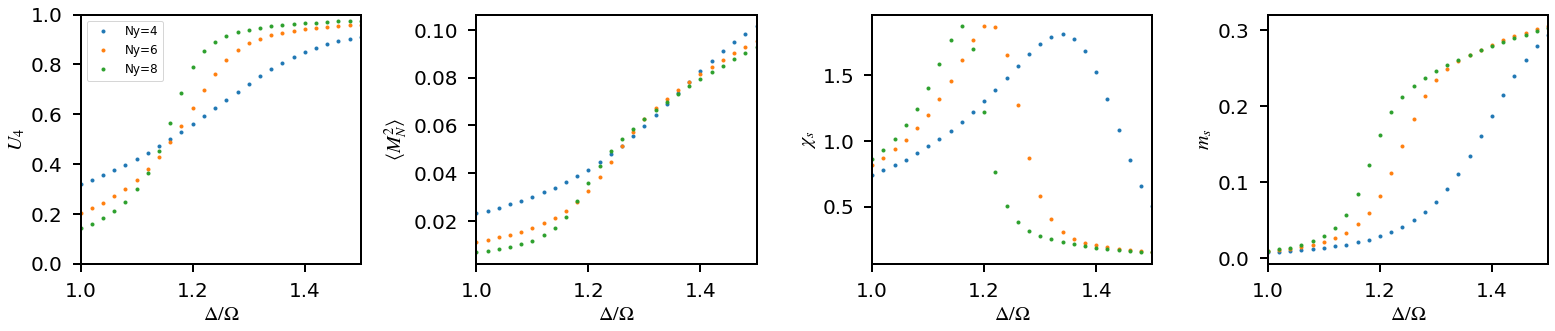

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

for n_y in distinct_nys:
    x_ax = data[n_y]["deltas"]
    
    axes[0].plot(x_ax, data[n_y]["U_4"], '.', label=f"Ny={n_y}")
    axes[0].set_ylabel(r"$U_4$")
    
    axes[1].plot(x_ax, data[n_y]["M_N_2"], '.')#, label=f"Ny={n_y}")
    axes[1].set_ylabel(r"$\langle M_N^2 \rangle$")
    
    axes[2].plot(x_ax, data[n_y]["X_s"], '.')#, label=f"Ny={n_y}")
    axes[2].set_ylabel(r"$\chi_s$")
    
    axes[3].plot(x_ax, data[n_y]["m_s"], '.')#, label=f"Ny={n_y}")
    axes[3].set_ylabel(r"$m_s$")

axes[0].legend(fontsize=12)
axes[0].set_ylim(0.0, 1.0)

for ax in axes:
    # ax.set_xmargin(0)
    ax.set_xlabel(r"$\Delta/\Omega$")

# axes[3].set_yscale("log")

plt.tight_layout()
plt.show()

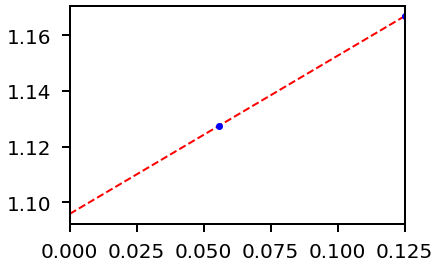

In [60]:
intersections = []

for n_y in distinct_nys[:-1]:
    d_delta = data[n_y]["deltas"][1] - data[n_y]["deltas"][0]
    
    int_ind = np.diff(np.sign(data[n_y + 2]["U_4"] - data[n_y]["U_4"])).nonzero()[0][0]
    
    delta_0 = data[n_y]["deltas"][int_ind]
    
    y_a0 = data[n_y]["U_4"][int_ind]
    y_a1 = data[n_y]["U_4"][int_ind + 1]
    y_b0 = data[n_y + 2]["U_4"][int_ind]
    y_b1 = data[n_y + 2]["U_4"][int_ind + 1]
    
    intersections.append(delta_0 + d_delta * (y_a0 - y_b0) / (y_b1 - y_a1 + y_a0 - y_b0))

def poly_fit(x, a, b):
    return [a + b * y for y in x]

popt, pcov = curve_fit(poly_fit, 2 / (distinct_nys[:-1] ** 2), intersections, (1.1, 0.1))

delta_c = popt[0]

x_ax = np.linspace(0, 2 / (distinct_nys[0] ** 2), 100)

plt.plot(x_ax, poly_fit(x_ax, popt[0], popt[1]), 'r--')
plt.plot(2 / (distinct_nys[:-1] ** 2), intersections, 'bo')

plt.show()

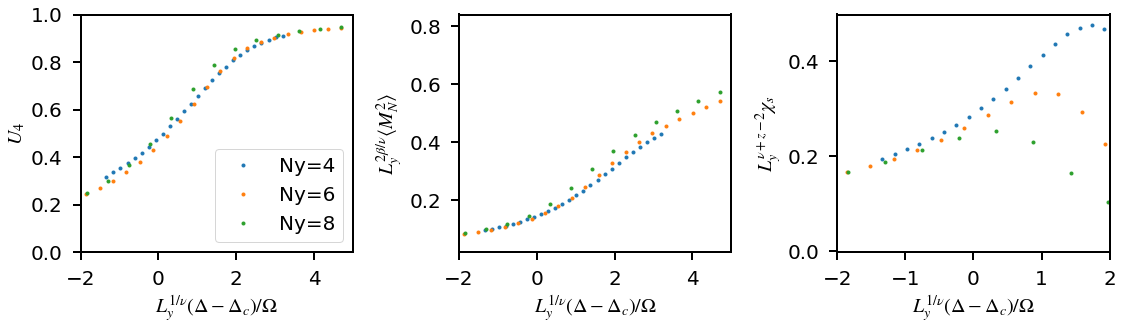

In [63]:
delta_c = intersections[-1]
delta_c = 1.1477

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

v = 0.629
beta = 0.326
eta = 0.036
z = 1.0

for n_y in distinct_nys:
    x_ax = (n_y ** (1 / v)) * (data[n_y]["deltas"] - delta_c)
    
    axes[0].plot(x_ax, data[n_y]["U_4"], '.', label=f"Ny={n_y}")
    axes[0].set_ylabel(r"$U_4$")
    
    # axes[1].plot(x_ax, (n_y ** (2 * beta / v)) * (data[n_y]["m_s"] ** 2), '.')#, label=f"Ny={n_y}")
    # axes[1].set_ylabel(r"$L_y^{2\beta/\nu} m_s^2$")
    
    axes[1].plot(x_ax, (n_y ** (2 * beta / v)) * data[n_y]["M_N_2"], '.')#, label=f"Ny={n_y}")
    axes[1].set_ylabel(r"$L_y^{2\beta/\nu}\langle M_N^2 \rangle$")
    
    axes[2].plot(x_ax, (n_y ** (eta + z - 2)) * data[n_y]["X_s"], '.')#, label=f"Ny={n_y}")
    axes[2].set_ylabel(r"$L_y^{\nu+z-2}\chi_s$")

for ax in axes:
    ax.set_xlabel(r"$L_y^{1/\nu}(\Delta - \Delta_c)/\Omega$")

axes[0].set_ylim(0.0, 1.0)

axes[0].set_xlim(-2.0, 5.0)
axes[1].set_xlim(-2.0, 5.0)
axes[2].set_xlim(-2.0, 2.0)

axes[0].legend()
plt.tight_layout()
plt.show()